$ \Large \frac{d^2x}{dt^2} - \mu(1 - (\frac{dx}{dt})^2)\frac{dx}{dt} = 0 $

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [242]:
mu = 1
x0 = 0
y0 = 1e-3
Tk = 500
h = 0.5

def dx(x, y):
    return y

def dy(x, y):
    return mu * (1 - y**2) * y - x

def f(x, y):
    return np.array([dx(x,y), dy(x,y)])

In [243]:
class RungeKutta_2D_Solver:
    def __init__(self, f, h, x0, y0, Tk):
        self._f = f
        self._h = h
        self._x0 = x0
        self._y0 = y0
        self._Tk = Tk

    def _predict(self, state):
        x = state[0]
        y = state[1]
        return state + self._h * self._f(x, y)
    
    def _correct(self, state, pred_state):
        x = state[0]
        y = state[1]
        pred_x = pred_state[0]
        pred_y = pred_state[1]
        return state + self._h * (self._f(x, y) + self._f(pred_x, pred_y)) / 2
    
    def solve(self):
        state = np.array([self._x0, self._y0])
        solution = np.zeros((self._Tk, 2))
        solution[0] = np.copy(state)
        for i in range(1, self._Tk):
            x = state[0]
            y = state[1]
            pred_state = self._predict(state)
            state = self._correct(state, pred_state)
            solution[i] = np.copy(state)
        return solution

In [244]:
def show_solution(solution):

    t = np.arange(0, h * Tk, h)
    x = solution[:,0].reshape(-1)
    y = solution[:,1].reshape(-1)

    fig, ax = plt.subplots(nrows=2,figsize=(20,20))

    ax[0].tick_params(axis='both', which='major', labelsize=20)
    ax[0].tick_params(axis='both', which='minor', labelsize=20)

    ax[1].tick_params(axis='both', which='major', labelsize=20)
    ax[1].tick_params(axis='both', which='minor', labelsize=20)

    ax[0].set_title("x(t)", fontsize=20)
    ax[1].set_title("y(t)", fontsize=20)

    ax[0].plot(t, x)
    ax[1].plot(t, y)

    plt.show()

In [245]:
solver = RungeKutta_2D_Solver(f, h, x0, y0, Tk)
solution = solver.solve()

Runge-Kutta 2nd order implicit


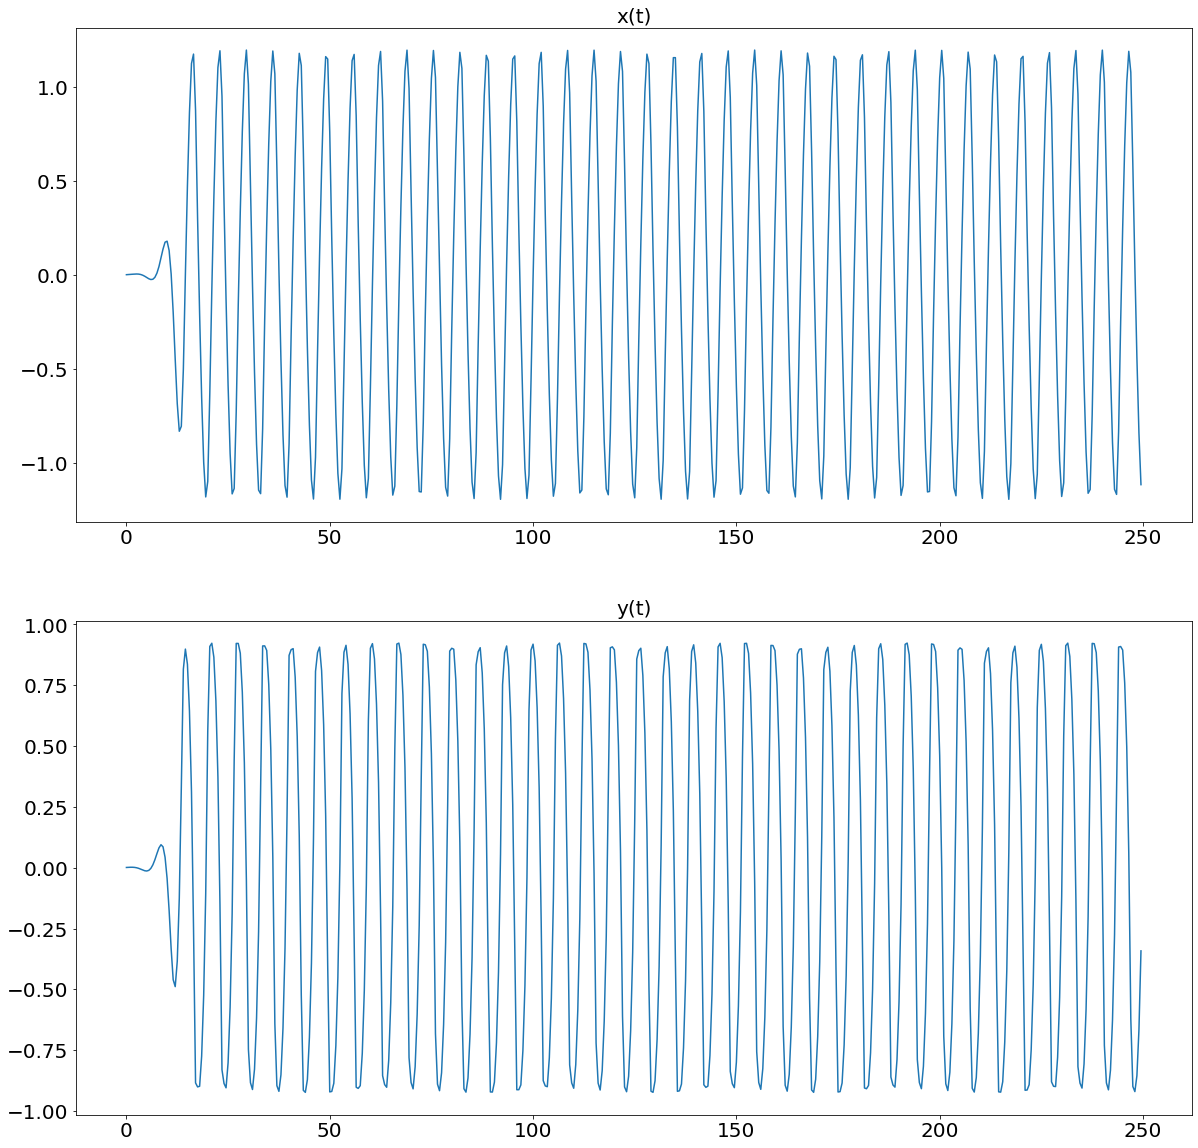

In [246]:
print("Runge-Kutta 2nd order implicit")
show_solution(solution)

In [247]:
def euler_method():
    
    F = np.zeros((Tk, 2))
    F[0] = np.array([x0, y0])
    
    for i in range(1, Tk):
        x = F[i-1][0]
        y = F[i-1][1]
        dF_v = f(x, y)
        for j in range(2):
            F[i][j] = F[i-1][j] + dF_v[j] * h
    
    return F

In [248]:
solution = euler_method()

Euler 1st order explicit


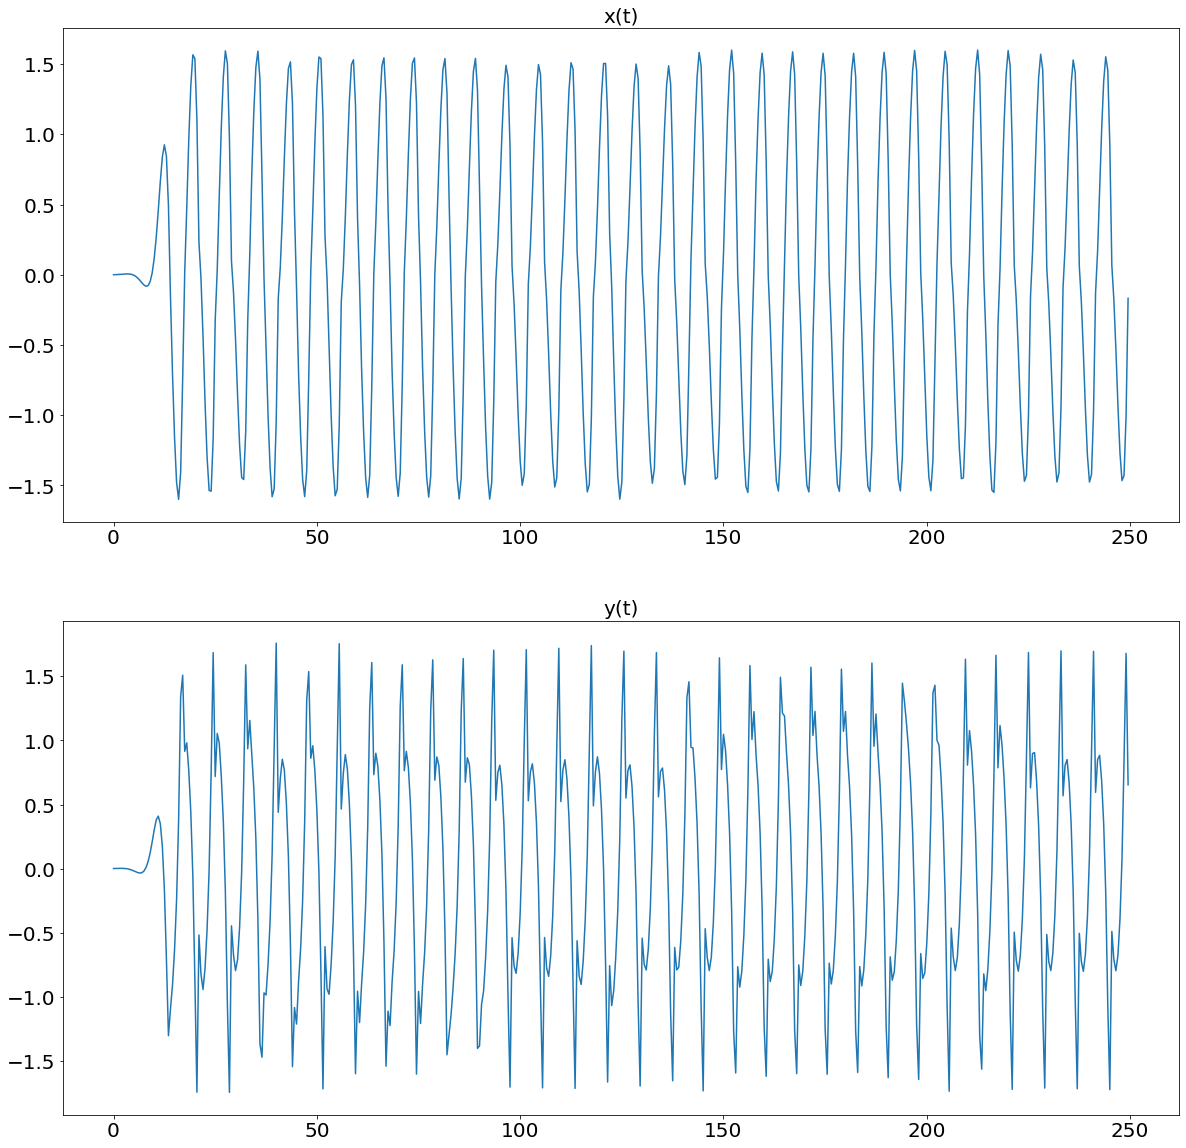

In [249]:
print("Euler 1st order explicit")
show_solution(solution)

<h1>Conclusion</h1>
<p style="font-size: 12pt">Explicit method needs very accurate modeling unlike implicit one</p>